## Problem Statement:
**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.**

### Importing Required Library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib as kl
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reaing Data

In [2]:
df = pd.read_csv(r"C:\Users\Arya\Desktop\Data cv\Used Car Data.csv", sep='\t')
df.head()

,Brand,Name_URL,Assured,Number,View,Name,Distance,Fuel,Transmission,Amount,Price,Emi,Bookedbutton,Text
0,2019 Toyota Etios Liva,https://www.cardekho.com/buy-used-car-details/...,CarDekho Assured,14,NaN,1.4 VD Dual Tone,"62,642",Diesel,Manual,6.78,Fixed Price,"12,089",Schedule Test Drive,NaN
1,2015 Ford EcoSport,https://www.cardekho.com/buy-used-car-details/...,CarDekho Assured,13,NaN,1.5 DV5 MT Titanium,"86,059",Diesel,Manual,5.48,Fixed Price,"11,096",Schedule Test Drive,NaN
2,2013 Maruti Wagon R Stingray,https://www.cardekho.com/buy-used-car-details/...,CarDekho Assured,13,20.0,VXI,"90,128",Petrol,Manual,2.96,Fixed Price,NaN,Schedule Test Drive,NaN
3,2015 Honda Jazz,https://www.cardekho.com/buy-used-car-details/...,CarDekho Assured,14,3.0,1.5 SV i DTEC,"65,911",Diesel,Manual,6.96,Fixed Price,"14,093",Schedule Test Drive,NaN
4,2018 Maruti Vitara Brezza,https://www.cardekho.com/buy-used-car-details/...,CarDekho Assured,15,24.0,ZDi AMT,"37,901",Diesel,Automatic,9.06,Fixed Price,"18,345",Schedule Test Drive,NaN


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (902, 14)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Brand             0
Name_URL          0
Assured           0
Number            0
View              8
Name              0
Distance          0
Fuel              0
Transmission      0
Amount            0
Price            18
Emi             160
Bookedbutton     18
Text            898
dtype: int64



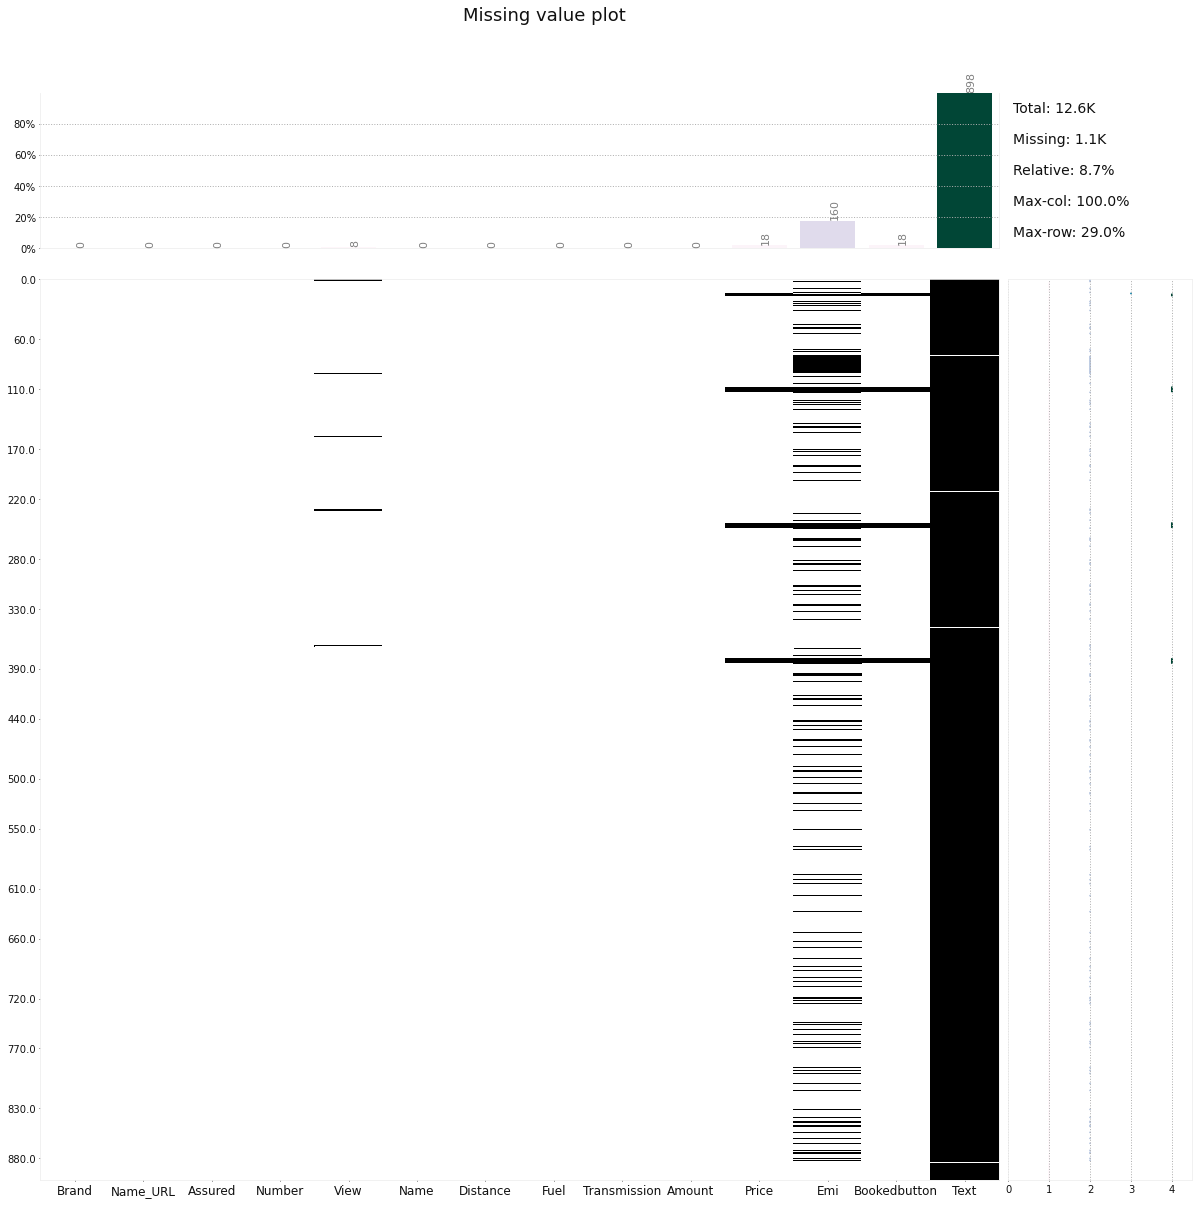

In [5]:
kl.missingval_plot(df) # returns a figure containing information about missing values
plt.tight_layout()

#### There is null value found in dataset

### Droping Unwanted Columns

In [6]:
col = ['Name_URL','Text']
df = df.drop(col, axis = 1)
df.head(2)

,Brand,Assured,Number,View,Name,Distance,Fuel,Transmission,Amount,Price,Emi,Bookedbutton
0,2019 Toyota Etios Liva,CarDekho Assured,14,NaN,1.4 VD Dual Tone,"62,642",Diesel,Manual,6.78,Fixed Price,"12,089",Schedule Test Drive
1,2015 Ford EcoSport,CarDekho Assured,13,NaN,1.5 DV5 MT Titanium,"86,059",Diesel,Manual,5.48,Fixed Price,"11,096",Schedule Test Drive


In [7]:
print('No of Rows and Columns after dropping columns ----->', df.shape )

No of Rows and Columns after dropping columns -----> (902, 12)


### Information about dataset

In [8]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         902 non-null    object 
 1   Assured       902 non-null    object 
 2   Number        902 non-null    int64  
 3   View          894 non-null    float64
 4   Name          902 non-null    object 
 5   Distance      902 non-null    object 
 6   Fuel          902 non-null    object 
 7   Transmission  902 non-null    object 
 8   Amount        902 non-null    object 
 9   Price         884 non-null    object 
 10  Emi           742 non-null    object 
 11  Bookedbutton  884 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 84.7+ KB
None


#### Categorical data present in our data set

### Convert Object Features Into Float

In [9]:
df['Emi'] = df['Emi']. str. replace(r',','')
df['Emi'] = df['Emi'].str.extract(r'(\d+.\d+)').astype('float')
df['Amount'] = df['Amount']. str. replace(r',','')
df['Amount'] = df['Amount'].str.extract(r'(\d+.\d+)').astype('float')
df['Distance'] = df['Distance']. str. replace(r',','')
df['Distance'] = df['Distance'].str.extract(r'(\d+.\d+)').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         902 non-null    object 
 1   Assured       902 non-null    object 
 2   Number        902 non-null    int64  
 3   View          894 non-null    float64
 4   Name          902 non-null    object 
 5   Distance      902 non-null    float64
 6   Fuel          902 non-null    object 
 7   Transmission  902 non-null    object 
 8   Amount        875 non-null    float64
 9   Price         884 non-null    object 
 10  Emi           742 non-null    float64
 11  Bookedbutton  884 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 84.7+ KB


#### Features are converted

### Handling Missing Value

In [10]:
df = df.apply(lambda x:x.fillna(x.mean()) if x.dtype == 'float64' else x.fillna(x.value_counts().index[0]))
df.isna().sum()

Brand           0
Assured         0
Number          0
View            0
Name            0
Distance        0
Fuel            0
Transmission    0
Amount          0
Price           0
Emi             0
Bookedbutton    0
dtype: int64

#### There is no null value

### Features Engineering

### Adding Manufacturer Year Column

In [11]:
df['Mfg_year'] = df['Brand'].str[0:4]
df['Mfg_year'] = df['Mfg_year'].astype(int)
df.head(2)

,Brand,Assured,Number,View,Name,Distance,Fuel,Transmission,Amount,Price,Emi,Bookedbutton,Mfg_year
0,2019 Toyota Etios Liva,CarDekho Assured,14,778.081655,1.4 VD Dual Tone,62642.0,Diesel,Manual,6.78,Fixed Price,12089.0,Schedule Test Drive,2019
1,2015 Ford EcoSport,CarDekho Assured,13,778.081655,1.5 DV5 MT Titanium,86059.0,Diesel,Manual,5.48,Fixed Price,11096.0,Schedule Test Drive,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         902 non-null    object 
 1   Assured       902 non-null    object 
 2   Number        902 non-null    int64  
 3   View          902 non-null    float64
 4   Name          902 non-null    object 
 5   Distance      902 non-null    float64
 6   Fuel          902 non-null    object 
 7   Transmission  902 non-null    object 
 8   Amount        902 non-null    float64
 9   Price         902 non-null    object 
 10  Emi           902 non-null    float64
 11  Bookedbutton  902 non-null    object 
 12  Mfg_year      902 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 88.2+ KB


### Adding Brand Column

In [13]:
df['Brand'] = df['Brand'].str[5:]
df.head(2)

,Brand,Assured,Number,View,Name,Distance,Fuel,Transmission,Amount,Price,Emi,Bookedbutton,Mfg_year
0,Toyota Etios Liva,CarDekho Assured,14,778.081655,1.4 VD Dual Tone,62642.0,Diesel,Manual,6.78,Fixed Price,12089.0,Schedule Test Drive,2019
1,Ford EcoSport,CarDekho Assured,13,778.081655,1.5 DV5 MT Titanium,86059.0,Diesel,Manual,5.48,Fixed Price,11096.0,Schedule Test Drive,2015


### Analysis of Data

### Brand Column

In [14]:
b = df['Brand'].value_counts()
b

Maruti Swift               102
Maruti Baleno               85
Maruti Swift Dzire          79
Maruti Ciaz                 57
Maruti Alto K10             55
                          ... 
Hyundai Santa Fe             1
Nissan Micra Active          1
Honda BR-V                   1
Ford Figo Aspire             1
Mercedes-Benz GLE Class      1
Name: Brand, Length: 63, dtype: int64

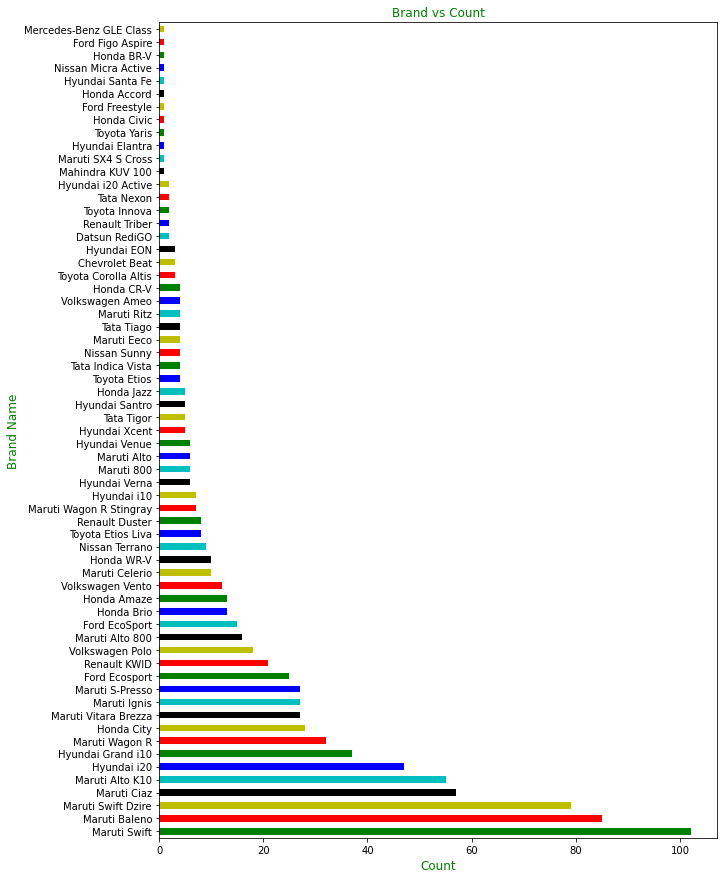

In [15]:
b.plot.barh(figsize = (10,15), color = ['g','r','y','k','c','b'])
plt.ylabel('Brand Name', c = 'g', fontsize = 12)
plt.xlabel('Count', c = 'g', fontsize = 12 )
plt.title('Brand vs Count', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows Maruri Swift highest selling car and Ford Figo Aspire lowest sell car

### Fuel Column

In [16]:
a = df['Fuel'].value_counts()
a

Petrol    560
Diesel    339
CNG         3
Name: Fuel, dtype: int64

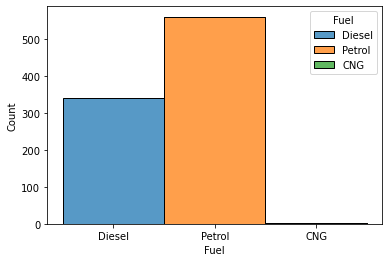

In [17]:
sns.histplot(binwidth=0.5, x="Fuel", hue="Fuel", data=df, stat="count", multiple="stack")
plt.show()

#### Petrol type car no of count highest

### Transmission Column

In [18]:
df['Transmission'].value_counts()

Manual       816
Automatic     86
Name: Transmission, dtype: int64

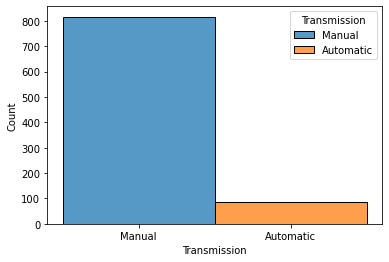

In [19]:
sns.histplot(binwidth=0.5, x="Transmission", hue="Transmission", data=df, stat="count", multiple="stack")
plt.show()

#### Manual car is highest sell

### Data distribution plot for every numeric feature

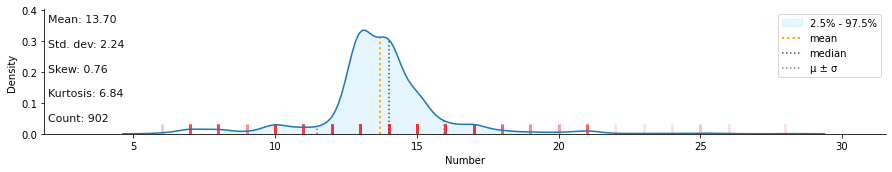

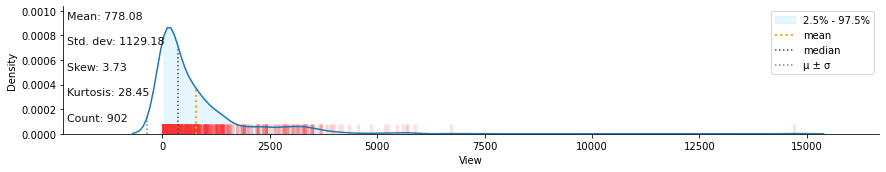

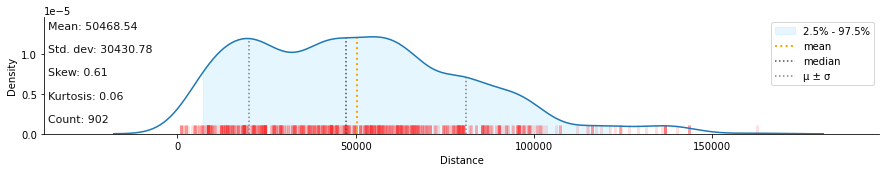

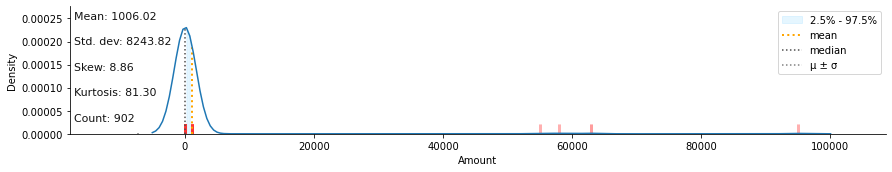

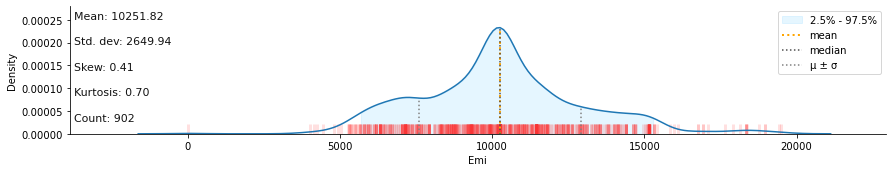

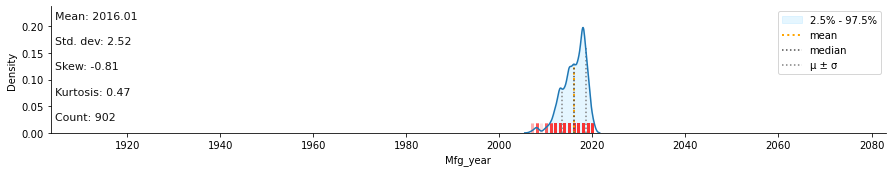

In [20]:
kl.dist_plot(df)
plt.tight_layout()

#### Data is skewed

### Flitering Categorical Feature

In [21]:
num = ['int32','int64', 'float64']
cat_col = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in num:
        continue
    cat_col.append(col)

### Encoding Categorical Features

In [22]:
df_dummies = pd.get_dummies(df[cat_col], drop_first = False)
df_dummies.head(2)

,Brand_Chevrolet Beat,Brand_Datsun RediGO,Brand_Ford EcoSport,Brand_Ford Ecosport,Brand_Ford Figo Aspire,Brand_Ford Freestyle,Brand_Honda Accord,Brand_Honda Amaze,Brand_Honda BR-V,Brand_Honda Brio,...,Name_i-VTEC V MT,Name_i-VTEC VX,Name_mFALCON D75 K4,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual,Price_Fixed Price,Bookedbutton_Schedule Test Drive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1


In [23]:
df_dummies.shape
df = df.join(df_dummies)
df.shape
df.head(2)

,Brand,Assured,Number,View,Name,Distance,Fuel,Transmission,Amount,Price,...,Name_i-VTEC V MT,Name_i-VTEC VX,Name_mFALCON D75 K4,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual,Price_Fixed Price,Bookedbutton_Schedule Test Drive
0,Toyota Etios Liva,CarDekho Assured,14,778.081655,1.4 VD Dual Tone,62642.0,Diesel,Manual,6.78,Fixed Price,...,0,0,0,0,1,0,0,1,1,1
1,Ford EcoSport,CarDekho Assured,13,778.081655,1.5 DV5 MT Titanium,86059.0,Diesel,Manual,5.48,Fixed Price,...,0,0,0,0,1,0,0,1,1,1


In [24]:
df = df.drop(columns = cat_col, axis = 1)
df.head(2)

,Number,View,Distance,Amount,Emi,Mfg_year,Brand_Chevrolet Beat,Brand_Datsun RediGO,Brand_Ford EcoSport,Brand_Ford Ecosport,...,Name_i-VTEC V MT,Name_i-VTEC VX,Name_mFALCON D75 K4,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual,Price_Fixed Price,Bookedbutton_Schedule Test Drive
0,14,778.081655,62642.0,6.78,12089.0,2019,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
1,13,778.081655,86059.0,5.48,11096.0,2015,0,0,1,0,...,0,0,0,0,1,0,0,1,1,1


#### Categorical features converted

### Spliting Dataset into features and label

In [25]:
x = df.drop('Amount', axis = 1)
y = df.Amount
print('Data has been splited')

Data has been splited


### Data Scaling

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.32379695e-01, -1.00737033e-16,  4.00259715e-01, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00],
       [-3.14835604e-01, -1.00737033e-16,  1.17020358e+00, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00],
       [-3.14835604e-01, -6.71730329e-01,  1.30399107e+00, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.32379695e-01, -6.13248236e-01, -1.37820309e+00, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.32379695e-01, -6.13248236e-01, -1.37820309e+00, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.32379695e-01, -6.13248236e-01, -1.37820309e+00, ...,
         3.24641582e-01,  0.00000000e+00,  0.00000000e+00]])

#### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [31]:
bag_dt = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [32]:
bag_dt.oob_score

True

In [33]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.9251936470969164


In [34]:
y_pred = bag_dt.predict(x_test)

In [35]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_dt.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9251936470969164
RMSE of Model -------> 3040.460641814169
MSE of Model -------> 9244400.914421028
Score of test data ----> 0.9251936470969164


#### Conclusion : Decision Tree model has 92% score

### XGBoost model instantiaing, training and evaluating

In [36]:
bag_xgb = BaggingRegressor(xgb.XGBRegressor(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [37]:
bag_xgb.oob_score

True

In [38]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.93811216599169


In [39]:
y_pred = bag_xgb.predict(x_test)

In [40]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_xgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.93811216599169
RMSE of Model -------> 2765.4944209710134
MSE of Model -------> 7647959.392421801
Score of test data ----> 0.93811216599169


#### Conclusion : XGBoost model has 93% score

### Knn model instantiaing, training and evaluating

In [41]:
bag_Knn = BaggingRegressor(KNeighborsRegressor(n_neighbors = 5), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [42]:
bag_Knn.oob_score

True

In [43]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.14768034013917808


In [44]:
y_pred = bag_dt.predict(x_test)

In [45]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Knn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9251936470969164
RMSE of Model -------> 3040.460641814169
MSE of Model -------> 9244400.914421028
Score of test data ----> 0.14768034013917808


#### Conclusion : KNN model has 92% score

### Random Forest model instantiaing, training and evaluating

In [47]:
bag_Rn = BaggingRegressor(RandomForestRegressor(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [48]:
bag_Rn.oob_score

True

In [49]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.7701994651232211


In [50]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Rn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9251936470969164
RMSE of Model -------> 3040.460641814169
MSE of Model -------> 9244400.914421028
Score of test data ----> 0.7701994651232211


### AdaBoost model instantiaing, training and evaluating

In [51]:
bag_Ada = BaggingRegressor(AdaBoostRegressor(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [52]:
bag_Ada.oob_score

True

In [53]:
bag_Ada.fit(x_train, y_train)
print('Bagging AdaBoost score ------->', bag_Ada.score(x_test, y_test))

Bagging AdaBoost score -------> 0.8880176178308465


In [55]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Ada.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9251936470969164
RMSE of Model -------> 3040.460641814169
MSE of Model -------> 9244400.914421028
Score of test data ----> 0.8880176178308465


#### Conclusion : AdaBoost model has 92% score

### Linear Regression model instantiaing, training and evaluating

In [56]:
bag_Lr = BaggingRegressor(LinearRegression(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [57]:
bag_Lr.oob_score

True

In [58]:
bag_Lr.fit(x_train, y_train)
print('Bagging Linear Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Linear Regression score -------> -597097385.3832663


In [60]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Lr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9251936470969164
RMSE of Model -------> 3040.460641814169
MSE of Model -------> 9244400.914421028
Score of test data ----> -597097385.3832663


#### Conclusion : Linear Regression model has 92% score

### Looking RMSE score we found XGBoost has best model so we do Hyperparameter Tuning on it.

In [61]:
param = {'n_estimators': [50,100,150], 'max_samples': [1.0], 'bootstrap': [True]}

In [62]:
grid_search = GridSearchCV(estimator = bag_xgb, param_grid = param, cv = 5 , n_jobs = -1)

In [63]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    eval_metric='mlogloss',
                                                                    gamma=None,
                                                                    gpu_id=None,
                                                                    importance_type='gain',
                                                                    interaction_constraints=None,
                                                                    learning_rate=None,
         

In [64]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 50}


In [65]:
hxgb = BaggingRegressor(base_estimator=xgb.XGBRegressor(),max_samples = 1.0, bootstrap = True , n_estimators = 50)
hxgb.fit(x_train, y_train)
hxgb.score(x_test, y_test)

0.9464371668115473

In [66]:
y_pred = hxgb.predict(x_test)

In [67]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', hxgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.9464371668115473
RMSE of Model -------> 2572.7756425919933
MSE of Model -------> 6619174.507114644
Score of test data ----> 0.9464371668115473


#### After Hyperparameter Tuning model accuracy score 94%

### Saving The Model

In [68]:
# saving the model to the Local file system
filename = 'Car Price Prediction.pickle'
pickle.dump(hxgb, open(filename, 'wb'))

### Predict Car Price 

In [70]:
model = pickle.load(open('Car Price Prediction.pickle', 'rb'))

In [71]:
Prediction = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Orginal'])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
Predicted,2.060246,5.310994,1.520311,5.537214,4.463762,4.292747,57960.425781,2.043301,6.183212,3.324293,...,3.939211,6.213358,5.759528,42126.15625,3.323519,3.353791,2.920416,6.128139,39313.316406,5.133968
Orginal,6.540000,3.640000,1.390000,5.480000,4.270000,4.320000,63000.000000,1.740000,6.100000,2.980000,...,3.530000,6.360000,6.550000,55000.00000,3.130000,2.930000,2.750000,6.220000,58000.000000,5.390000


### Saving the predicted result in CSV file

In [72]:
Prediction.to_csv('Car Price Prediction.csv')

## Final Conclusion : XGBoost is our best model.